# **The Sparks Foundation - Data Science & Business Analytics Tasks**

# Done by - Jagannath Pal

# TASK-1 => Prediction using Supervised ML

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [123]:
df.to_csv('percentage.csv')

# Understanding the Data

In [3]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
df.shape

(25, 2)

In [5]:
df.size

50

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Exploratory Data Analysis

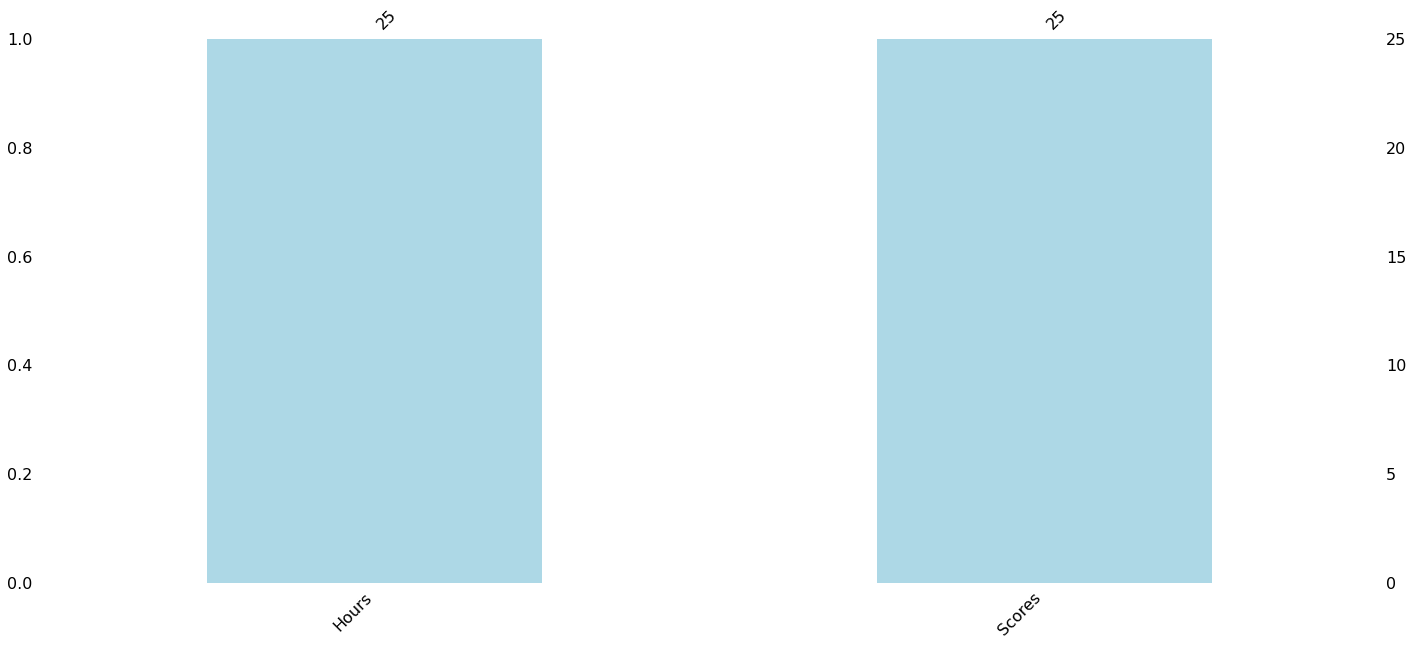

In [12]:
import missingno as no
no.bar(df, color='Lightblue')

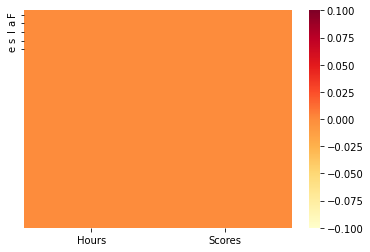

In [14]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlOrRd')

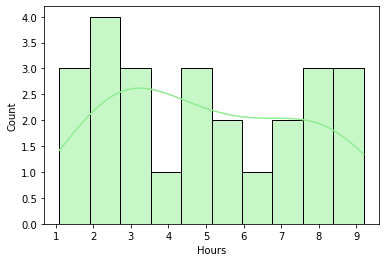

In [22]:
sns.histplot(x=df['Hours'],kde=True,bins=10,color='lightgreen')

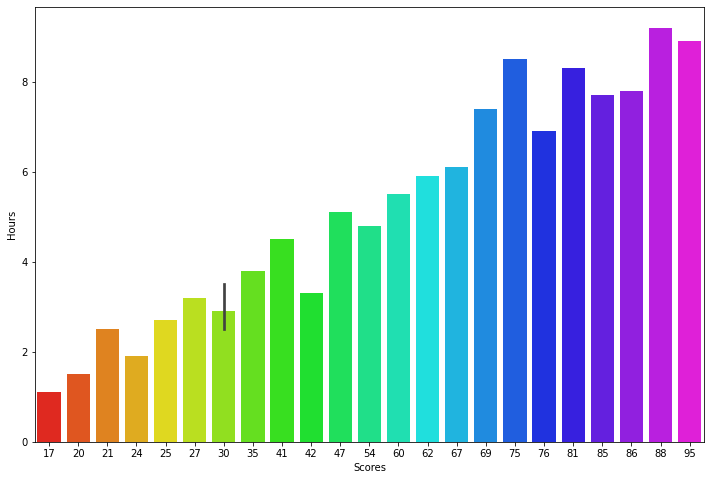

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.Scores,y=df['Hours'],palette='gist_rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

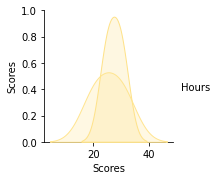

In [31]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Hours', palette='YlOrRd')
plt.show()

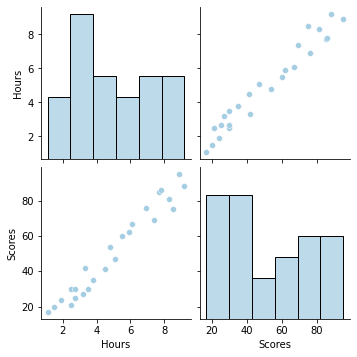

In [35]:
sns.pairplot(df)

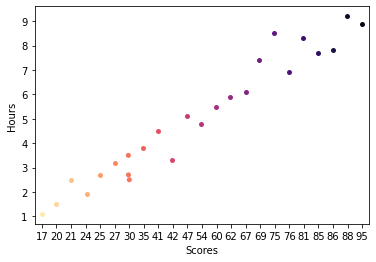

In [37]:
sns.stripplot(x=df.Scores,y=df['Hours'],palette='magma_r')

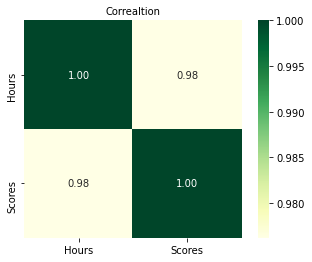

In [38]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="YlGn")
plt.title("Correaltion", size=10)
plt.show()

# Splitting the Data into Dependent and Indpendent variables

In [40]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# Training and Testing the Data

In [77]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction

In [91]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
ypred_test

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [109]:
df1 = pd.DataFrame({'Actual': ytest, 'Predicted': ypred_test})    
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Accuracy

In [110]:
import sklearn.metrics as metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac)

Accuracy of training data: 94.91209376364415
Accuracy of testing data: 96.78055545167994


## Error

In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


Our model has accuracy of **96.78%** ~ **97%** which is very good.

# Plotting Training Dataset

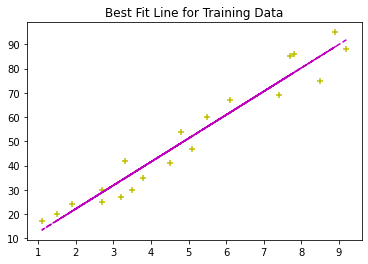

In [112]:
plt.scatter(xtrain, ytrain, color='y', marker='+')
plt.plot(xtrain, model.predict(xtrain), 'm--')
plt.title("Best Fit Line for Training Data")
plt.show()

# Plotting Testing Dataset

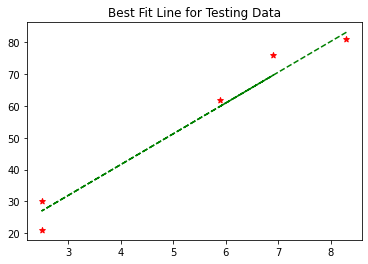

In [113]:
plt.scatter(xtest, ytest, color='r', marker='*')
plt.plot(xtest, model.predict(xtest), 'g--')
plt.title("Best Fit Line for Testing Data")
plt.show()

# Predicting Values

In [121]:
hours = 9.25
score = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score))

No of Hours = 9.25
Predicted Score = [92.38611528]


# Saving the Model

In [122]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))